<a href="https://colab.research.google.com/github/GabrielCdev/Time-Series-Processing/blob/main/TimeSeriesProcessing_Volcano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 04

- Previsão das emissões de CO2 do vulcão Mauna Loa para o próximo mês

# Aluno:
Gabriel Borges Calheiros

# Carregamento e análise do dataset

## Importação de Dados

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
volcano_df = pd.read_csv("https://raw.githubusercontent.com/GabrielCdev/Time-Series-Processing/main/datasets/dataset_mauna_loa.csv")

## Análise Primária

In [3]:
# Verificando os dados do dataset
volcano_df

,Month,"CO2 (ppm) mauna loa, 1965-1980"
0,1965-01,319.32
1,1965-02,320.36
2,1965-03,320.82
3,1965-04,322.06
4,1965-05,322.17
...,...,...
189,1980-10,336.63
190,1980-11,337.74
191,1980-12,338.36
192,NaN,NaN


## Remoção de linhas

In [4]:
# Removendo as 2 últimas linhas
volcano_df = volcano_df.iloc[:-2 , :]
volcano_df

,Month,"CO2 (ppm) mauna loa, 1965-1980"
0,1965-01,319.32
1,1965-02,320.36
2,1965-03,320.82
3,1965-04,322.06
4,1965-05,322.17
...,...,...
187,1980-08,337.19
188,1980-09,335.49
189,1980-10,336.63
190,1980-11,337.74


## Verificação de dados nulos

In [5]:
volcano_df.isna().sum()

Month                             0
CO2 (ppm) mauna loa, 1965-1980    0
dtype: int64

## Renomeação de colunas

In [6]:
volcano_df.columns

Index(['Month', 'CO2 (ppm) mauna loa, 1965-1980'], dtype='object')

In [7]:
# Renomeando uma coluna
volcano_df = volcano_df.rename(columns={'CO2 (ppm) mauna loa, 1965-1980': 'CO2 (ppm)'})
volcano_df

,Month,CO2 (ppm)
0,1965-01,319.32
1,1965-02,320.36
2,1965-03,320.82
3,1965-04,322.06
4,1965-05,322.17
...,...,...
187,1980-08,337.19
188,1980-09,335.49
189,1980-10,336.63
190,1980-11,337.74


# Criando novas colunas

In [8]:
# Convertendo em Datetime
volcano_df['Month'] = pd.to_datetime(volcano_df['Month'])
volcano_df

,Month,CO2 (ppm)
0,1965-01-01,319.32
1,1965-02-01,320.36
2,1965-03-01,320.82
3,1965-04-01,322.06
4,1965-05-01,322.17
...,...,...
187,1980-08-01,337.19
188,1980-09-01,335.49
189,1980-10-01,336.63
190,1980-11-01,337.74


In [9]:
# Criando novas colunas
volcano_df['Year'] = volcano_df['Month'].dt.year
volcano_df['Month'] = volcano_df['Month'].dt.month
volcano_df

,Month,CO2 (ppm),Year
0,1,319.32,1965
1,2,320.36,1965
2,3,320.82,1965
3,4,322.06,1965
4,5,322.17,1965
...,...,...,...
187,8,337.19,1980
188,9,335.49,1980
189,10,336.63,1980
190,11,337.74,1980


## Ajustando a posição das colunas

In [10]:
volcano_df = volcano_df.reindex(columns=['Month', 'Year', 'CO2 (ppm)'])
volcano_df

,Month,Year,CO2 (ppm)
0,1,1965,319.32
1,2,1965,320.36
2,3,1965,320.82
3,4,1965,322.06
4,5,1965,322.17
...,...,...,...
187,8,1980,337.19
188,9,1980,335.49
189,10,1980,336.63
190,11,1980,337.74


## Verificação do tipo de dados

In [11]:
volcano_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Month      192 non-null    int64 
 1   Year       192 non-null    int64 
 2   CO2 (ppm)  192 non-null    object
dtypes: int64(2), object(1)
memory usage: 4.6+ KB


In [12]:
volcano_df['CO2 (ppm)'] = volcano_df['CO2 (ppm)'].astype('float')
volcano_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      192 non-null    int64  
 1   Year       192 non-null    int64  
 2   CO2 (ppm)  192 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 4.6 KB


## Plotagem gráfica

<Axes: xlabel='Year', ylabel='CO2 (ppm)'>

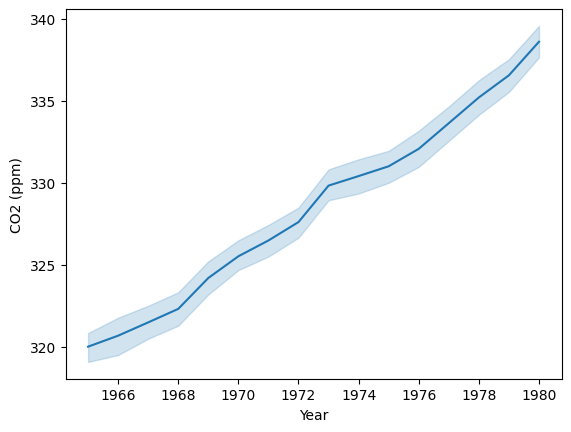

In [13]:
sns.lineplot(volcano_df, x="Year", y="CO2 (ppm)")

## Início do modelo por janela

In [14]:
new_volcano_df= volcano_df.copy()

In [15]:
for i in range(1,6):# Shift the "y" values by the specified number of lags
  new_volcano_df[f"CO2 (ppm) Lag {i}"] = new_volcano_df["CO2 (ppm)"].shift(i)

In [16]:
new_volcano_df

,Month,Year,CO2 (ppm),CO2 (ppm) Lag 1,CO2 (ppm) Lag 2,CO2 (ppm) Lag 3,CO2 (ppm) Lag 4,CO2 (ppm) Lag 5
0,1,1965,319.32,NaN,NaN,NaN,NaN,NaN
1,2,1965,320.36,319.32,NaN,NaN,NaN,NaN
2,3,1965,320.82,320.36,319.32,NaN,NaN,NaN
3,4,1965,322.06,320.82,320.36,319.32,NaN,NaN
4,5,1965,322.17,322.06,320.82,320.36,319.32,NaN
...,...,...,...,...,...,...,...,...
187,8,1980,337.19,339.25,340.87,341.19,340.57,339.88
188,9,1980,335.49,337.19,339.25,340.87,341.19,340.57
189,10,1980,336.63,335.49,337.19,339.25,340.87,341.19
190,11,1980,337.74,336.63,335.49,337.19,339.25,340.87


In [17]:
new_volcano_df = new_volcano_df.iloc[5:, :]
new_volcano_df

,Month,Year,CO2 (ppm),CO2 (ppm) Lag 1,CO2 (ppm) Lag 2,CO2 (ppm) Lag 3,CO2 (ppm) Lag 4,CO2 (ppm) Lag 5
5,6,1965,321.95,322.17,322.06,320.82,320.36,319.32
6,7,1965,321.20,321.95,322.17,322.06,320.82,320.36
7,8,1965,318.81,321.20,321.95,322.17,322.06,320.82
8,9,1965,317.82,318.81,321.20,321.95,322.17,322.06
9,10,1965,317.37,317.82,318.81,321.20,321.95,322.17
...,...,...,...,...,...,...,...,...
187,8,1980,337.19,339.25,340.87,341.19,340.57,339.88
188,9,1980,335.49,337.19,339.25,340.87,341.19,340.57
189,10,1980,336.63,335.49,337.19,339.25,340.87,341.19
190,11,1980,337.74,336.63,335.49,337.19,339.25,340.87
